# Semantic Structure and Interpretability of Word Embeddings using GloVe

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth
from gensim.models import word2vec
from gensim.models import FastText
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt

In [12]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

spreadsheet = gc.open('Sentiment Tagged Words')
worksheet = spreadsheet.worksheet('SENTIMENT LEXICON')
col_1 = worksheet.col_values(1)
col_2 = worksheet.col_values(2)
col_3 = worksheet.col_values(3)
words = []
words.append(col_1[1:])
words.append(col_2[1:])
words.append(col_3[1:])

In [5]:
def load_glove_model(file_name):
  print('Loading Glove Model...')
  f = open(file_name, 'r', encoding='utf-8')
  glove_model = {}
  for line in f:
    split_lines = line.split()
    word = split_lines[0]
    word_embedding = np.array([float(value) for value in split_lines[1:]])
    glove_model[word] = word_embedding
  f.close()
  print(len(glove_model), ' words loaded!')
  return glove_model

glove_model = load_glove_model('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/glove_model1/glove.model')

Loading Glove Model...
234215  words loaded!


In [14]:
def p(i, j):
  vec = []
  for word in words[j]:
    if word in glove_model.keys():
      word_vector = np.array(glove_model[word])
      vec.append(word_vector[i])
  vec = np.array(vec)
  return vec

def q(i, j):
  vec = []
  for category in range(3):
    if category != j:
      for word in words[j]:
        if word in glove_model.keys():
          word_vector = np.array(glove_model[word])
          vec.append(word_vector[i])
  vec = np.array(vec)
  return vec

def mean_p(i, j):
  return np.mean(p(i, j))

def mean_q(i, j):
  return np.mean(q(i, j))

def sd_p(i, j):
  return np.std(p(i, j))

def sd_q(i, j):
  return np.std(q(i, j))

def w_b(i, j):
  return 0.25 * np.log(0.25 * (sd_p(i, j)**2 / sd_q(i, j)**2 + sd_q(i, j)**2 / sd_p(i, j)**2 + 2)) + 0.25 * ((mean_p(i, j) - mean_q(i, j))**2 / (sd_p(i, j)**2 + sd_q(i, j)**2))

def w_sb(i, j):
  val = 0.25 * np.log(0.25 * (sd_p(i, j)**2 / sd_q(i, j)**2 + sd_q(i, j)**2 / sd_p(i, j)**2 + 2)) + 0.25 * ((mean_p(i, j) - mean_q(i, j))**2 / (sd_p(i, j)**2 + sd_q(i, j)**2))
  if (mean_p(i, j) - mean_q(i, j)) >= 0:
    return val
  else:
    return -1 * val

def w_c(i, j):
  return mean_p(i, j)

W_B = []
W_SB = []
W_C = []
for i in range(300):
  row_b = []
  row_sb = []
  row_c = []
  for j in range(3):
    row_b.append(w_b(i, j))
    row_sb.append(w_sb(i, j))
    row_c.append(w_c(i, j))
  W_B.append(row_b)
  W_SB.append(row_sb)
  W_C.append(row_c)

W_NB = normalize(W_B, norm='l1', axis=0)
W_NSB = normalize(W_SB, norm='l1', axis=0)

epsilon = []
flatten_words = words[0] + words[1] + words[2]
for word in flatten_words:
  epsilon.append(np.array(glove_model[word]))
epsilon = np.array(epsilon)
epsilon_s = (epsilon - np.mean(epsilon)) / np.std(epsilon)

def I():
  return np.matmul(epsilon_s, W_NSB)

def I_star():
  return np.matmul(epsilon, W_C)

KeyError: ignored

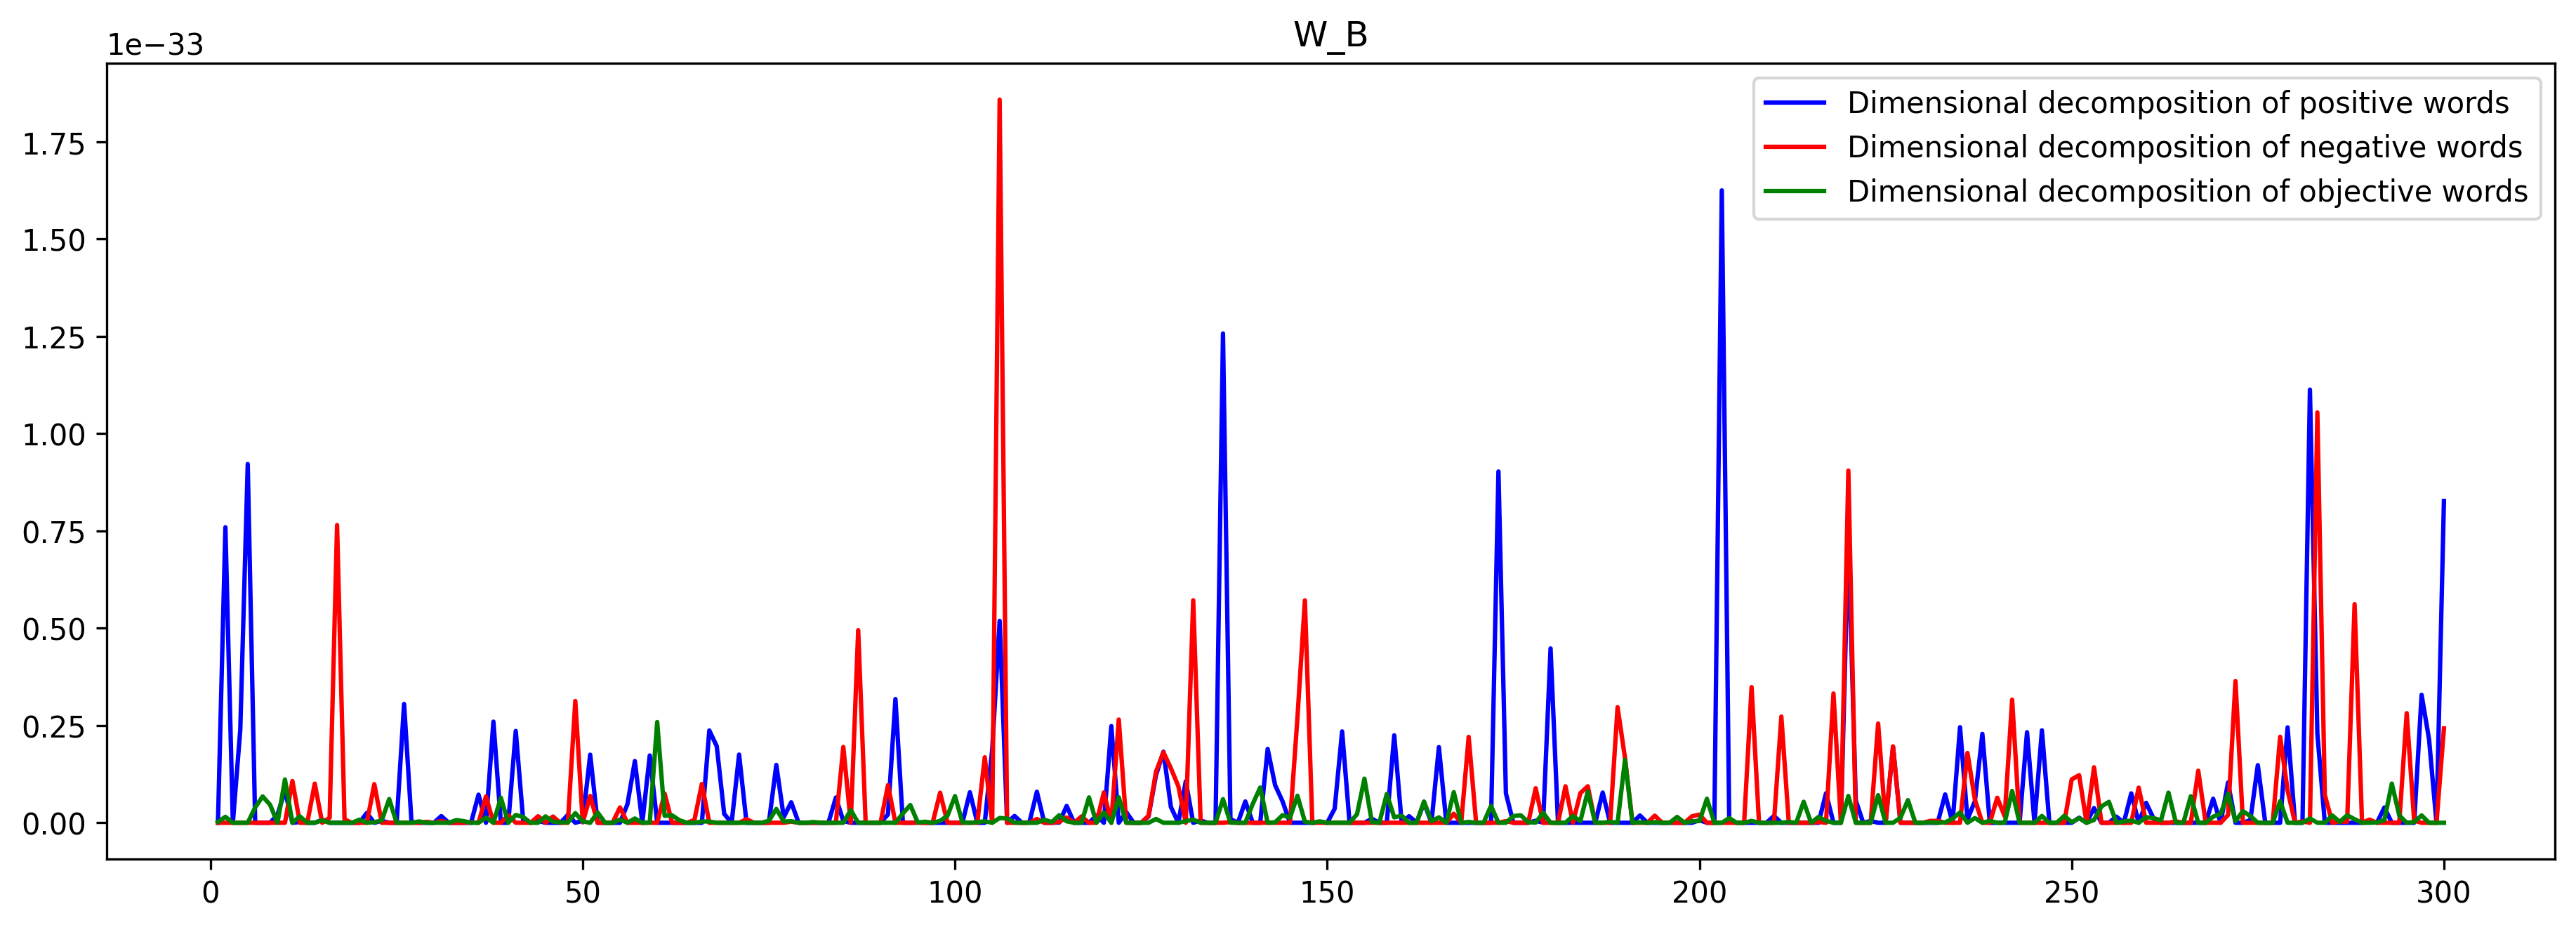

In [15]:
#@title
#@W_B
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_B).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_B).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_B).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
# plt.xticks(x, rotation='vertical')
plt.title('W_B')
plt.legend()
plt.show()

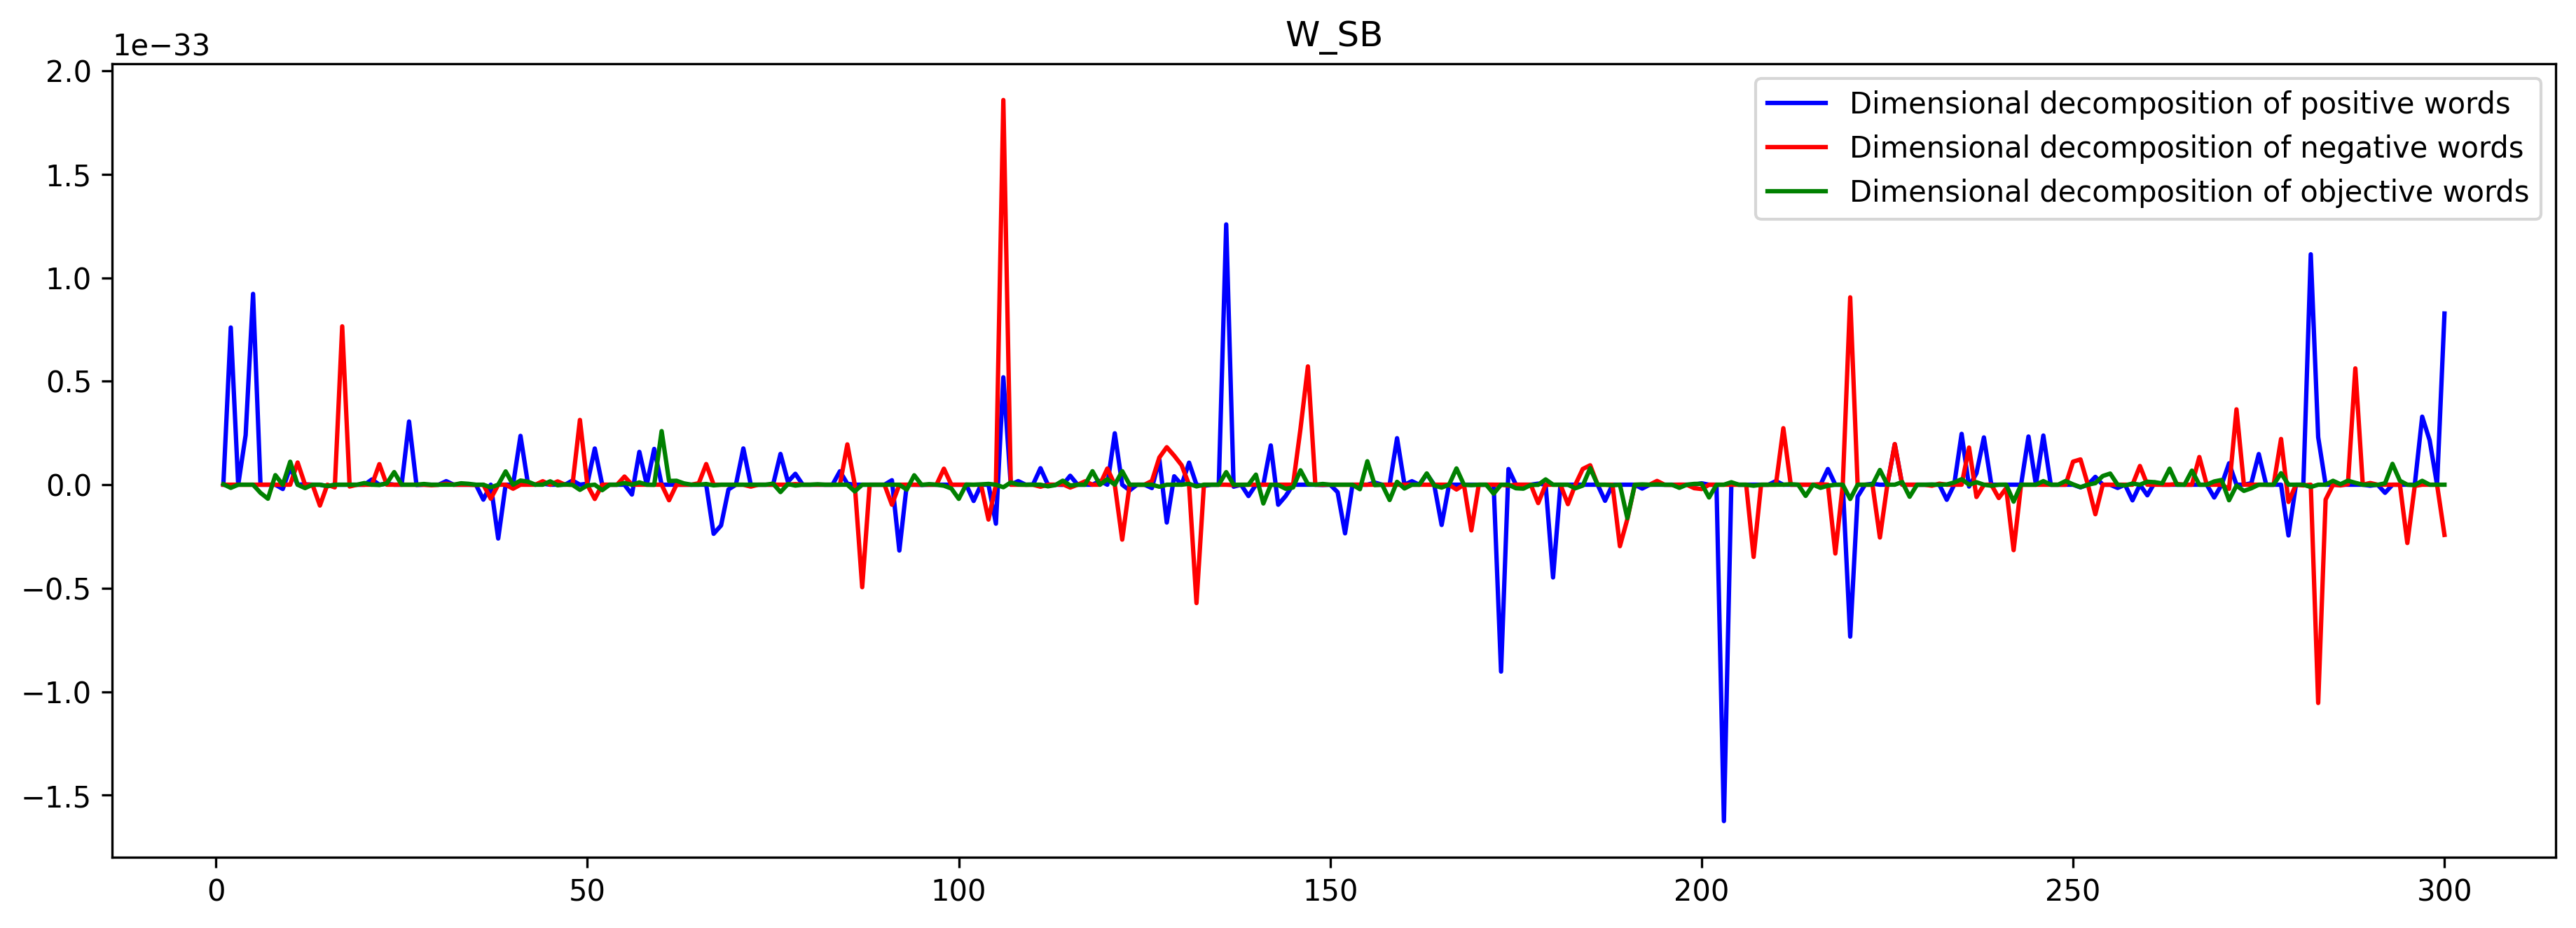

In [16]:
#@title
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_SB).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_SB).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_SB).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
# plt.xticks(x, rotation='vertical')
plt.title('W_SB')
plt.legend()
plt.show()

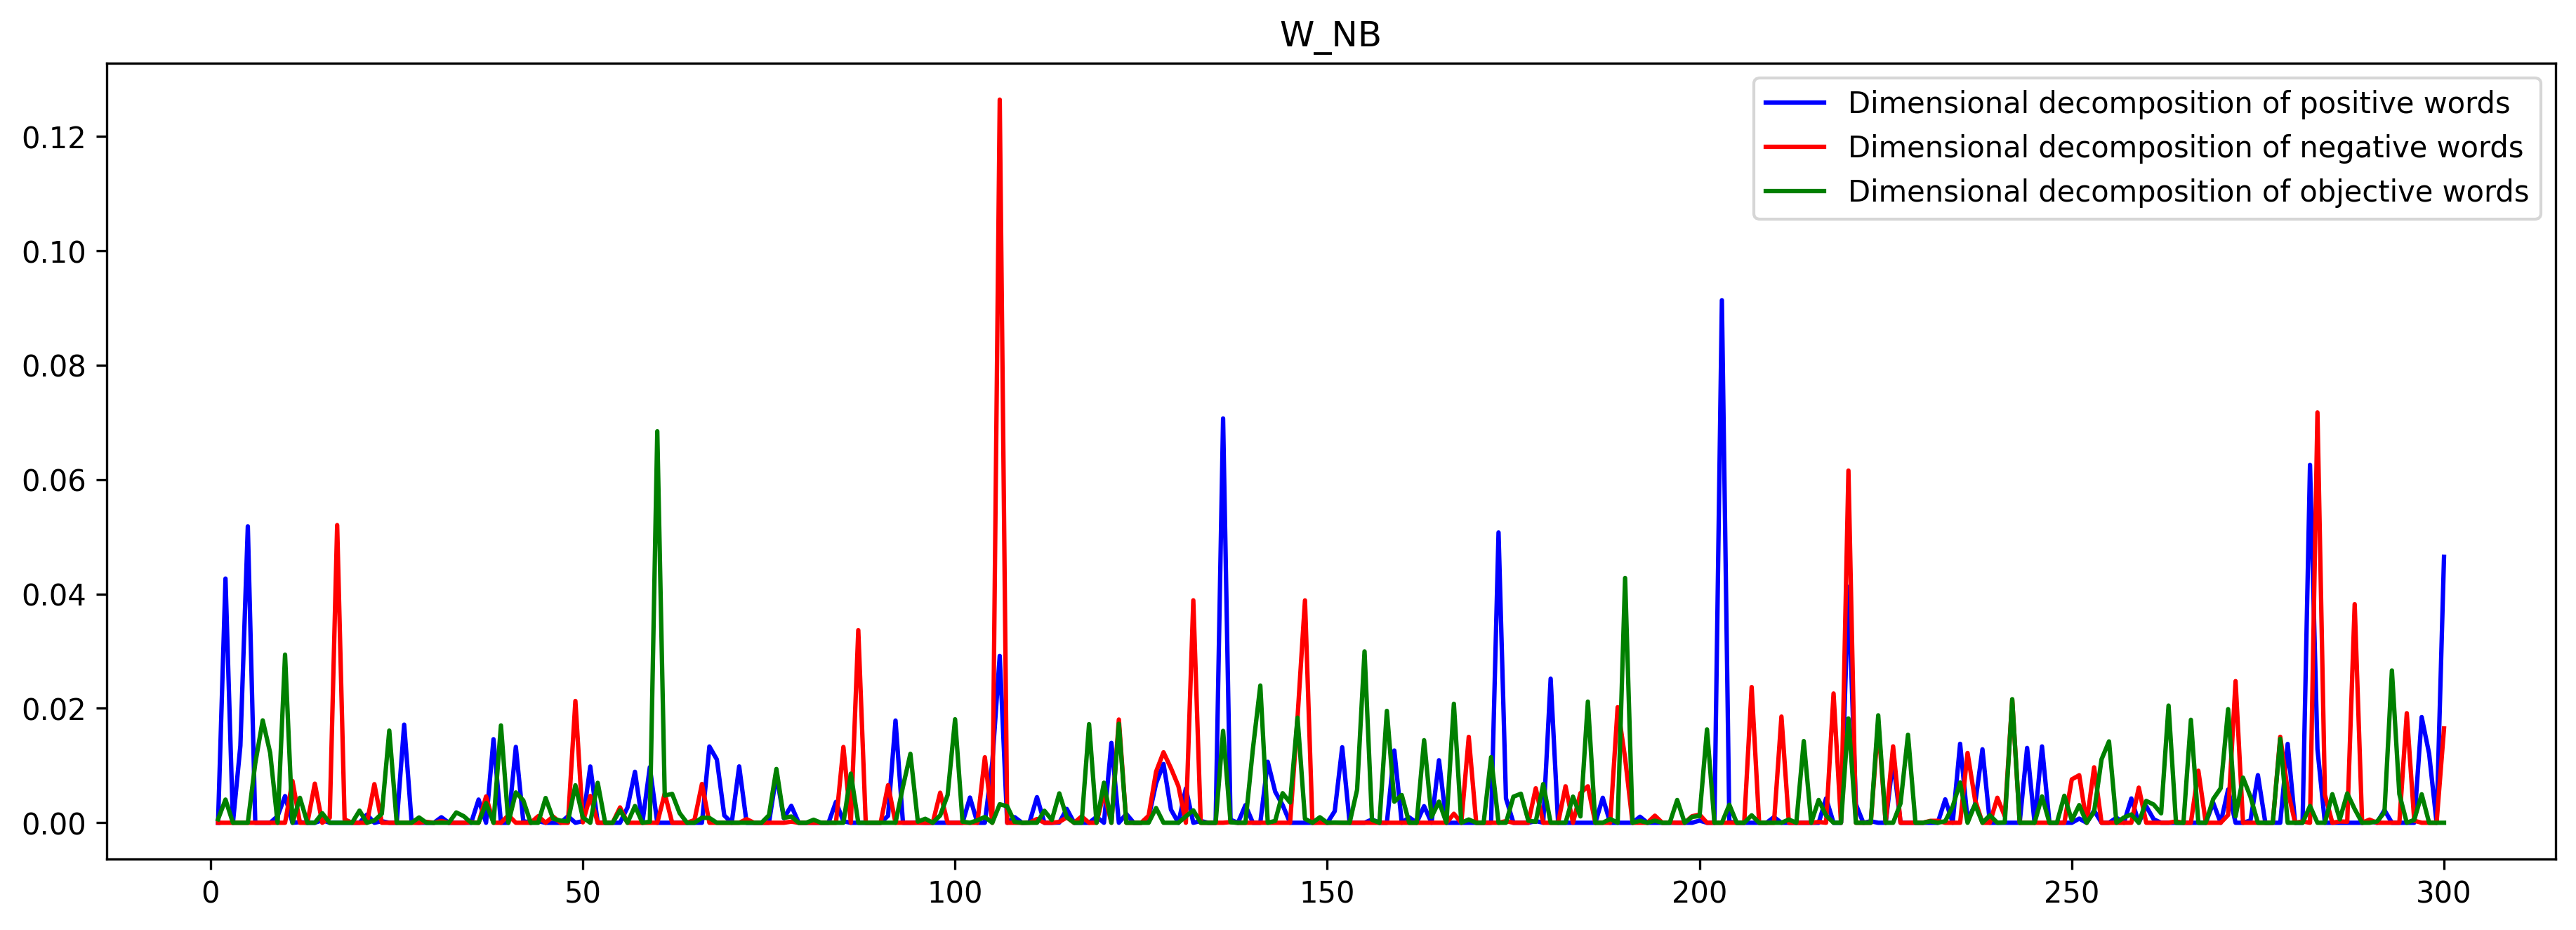

In [17]:
#@title
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_NB).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_NB).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_NB).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
# plt.xticks(x, rotation='vertical')
plt.title('W_NB')
plt.legend()
plt.show()

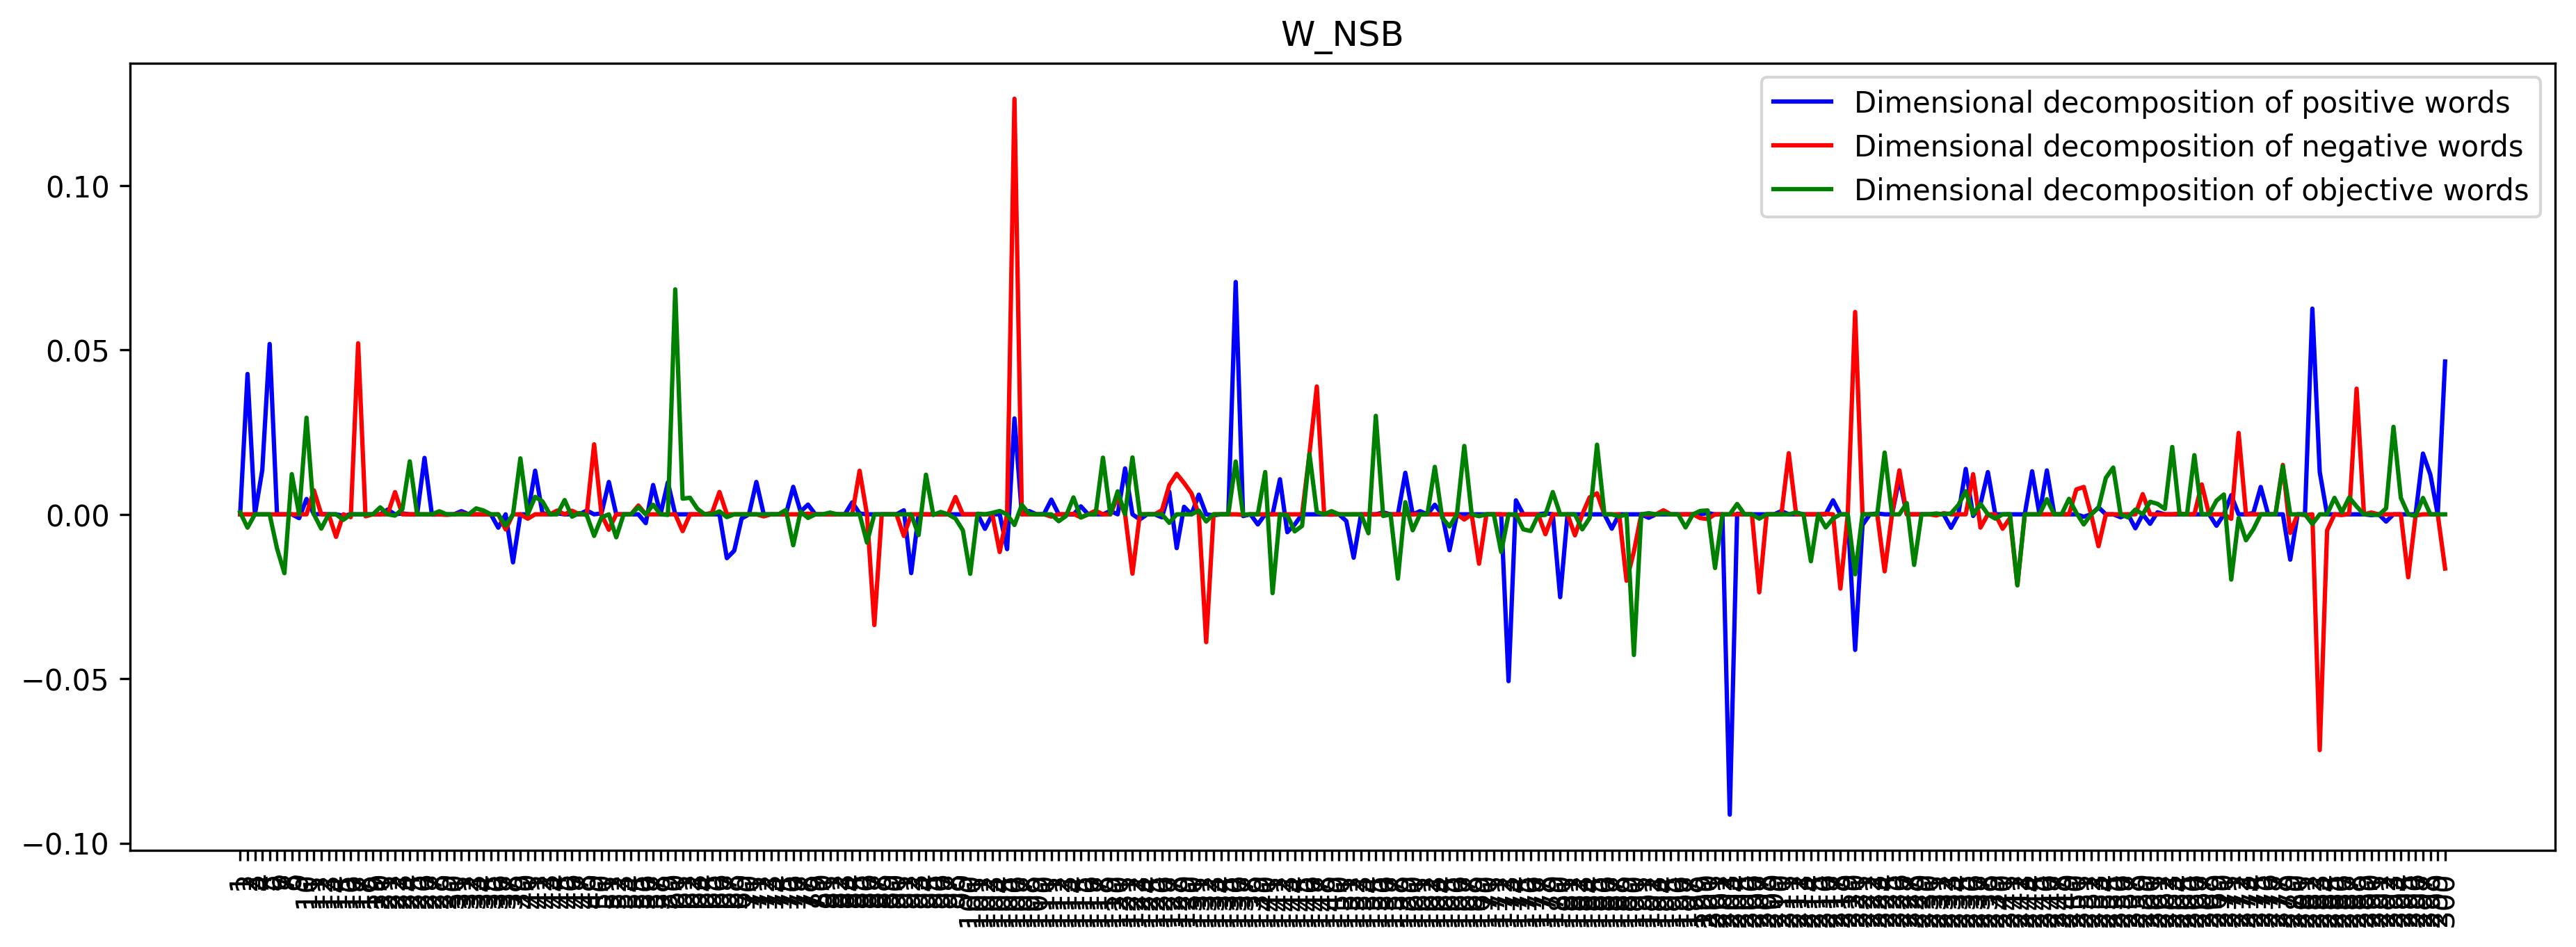

In [18]:
#@title
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_NSB).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_NSB).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_NSB).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
plt.xticks(x, rotation='vertical')
plt.title('W_NSB')
plt.legend()
plt.show()

In [ ]:
a = np.array(keyed_vector['word2vec'].word_vec('කීකරු'), dtype='float32').reshape((1,300))
b = np.array(W_NB)
x = np.dot(a, b)
a = np.array(keyed_vector['word2vec'].word_vec('නරක'), dtype='float32').reshape((1,300))
b = np.array(W_NB)
y = np.dot(a, b)
from numpy import dot
from numpy.linalg import norm
cos_sim = dot(x, y.T)/(norm(x)*norm(y))
cos_sim

array([[0.93283623]])

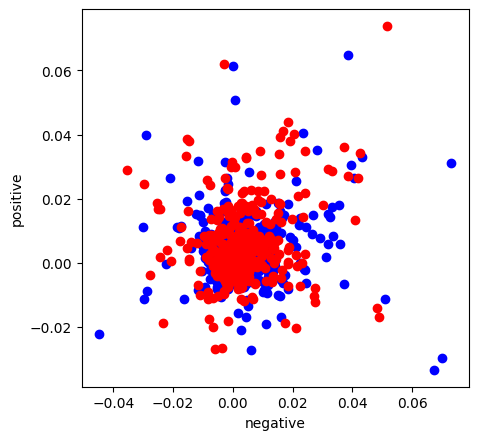

In [19]:
p_p = []
p_n = []
n_p = []
n_n = []

i = 0
for word in words[0]:
  if word in glove_model.keys():
    word_vector = np.array(glove_model[word]).reshape((1,300))
    weight = np.array(W_NSB)
    x = np.dot(word_vector, weight)
    p_p.append(x[0][0])
    p_n.append(x[0][1])

for word in words[1]:
  if word in glove_model.keys():
    word_vector = np.array(glove_model[word]).reshape((1,300))
    weight = np.array(W_NSB)
    x = np.dot(word_vector, weight)
    n_p.append(x[0][0])
    n_n.append(x[0][1])

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(p_n, p_p, color='b')
plt.scatter(n_n, n_p, color='r')
# plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'k')
plt.xlabel('negative')
plt.ylabel('positive')
plt.show()